In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
# Data File
filepath = ('../Resources/flavors_of_cacao.csv')

# Read CSV
df = pd.read_csv(filepath)
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
# Change Column Names
df.columns = [
    'company_maker', 
    'specific_bean_origin_or_bar_name', 
    'ref', 
    'review_date', 
    'cocoa_percent', 
    'company_location', 
    'rating', 
    'bean_type', 
    'broad_bean_origin'
]

print(df.columns)

Index(['company_maker', 'specific_bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
df.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [7]:
# Drop the Bean Type Column
df2 = df.drop(columns=['bean_type'])

df2.head()

,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [8]:
df_cleaned = df2.dropna()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1794 non-null   object 
 1   specific_bean_origin_or_bar_name  1794 non-null   object 
 2   ref                               1794 non-null   int64  
 3   review_date                       1794 non-null   int64  
 4   cocoa_percent                     1794 non-null   object 
 5   company_location                  1794 non-null   object 
 6   rating                            1794 non-null   float64
 7   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 126.1+ KB


In [9]:
df_cleaned.to_csv('../Resources/updated_flavors_of_cacao.csv')

In [10]:
df_cleaned['broad_bean_origin'].value_counts()

broad_bean_origin
Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Trinidad, Ecuador          1
Venezuela, Carribean       1
Name: count, Length: 100, dtype: int64

In [11]:
# Is there a relationship between the rating of the cocoa and the cocoa solids percentage?

In [12]:
df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: cocoa_percent, Length: 1794, dtype: float64

In [13]:
df_cleaned['cocoa_percent'] = df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)

/var/folders/7s/yj1x048507x6rv5qp0nlrsp00000gn/T/ipykernel_45431/677244272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cocoa_percent'] = df_cleaned['cocoa_percent'].str.replace('%', '').astype(float)


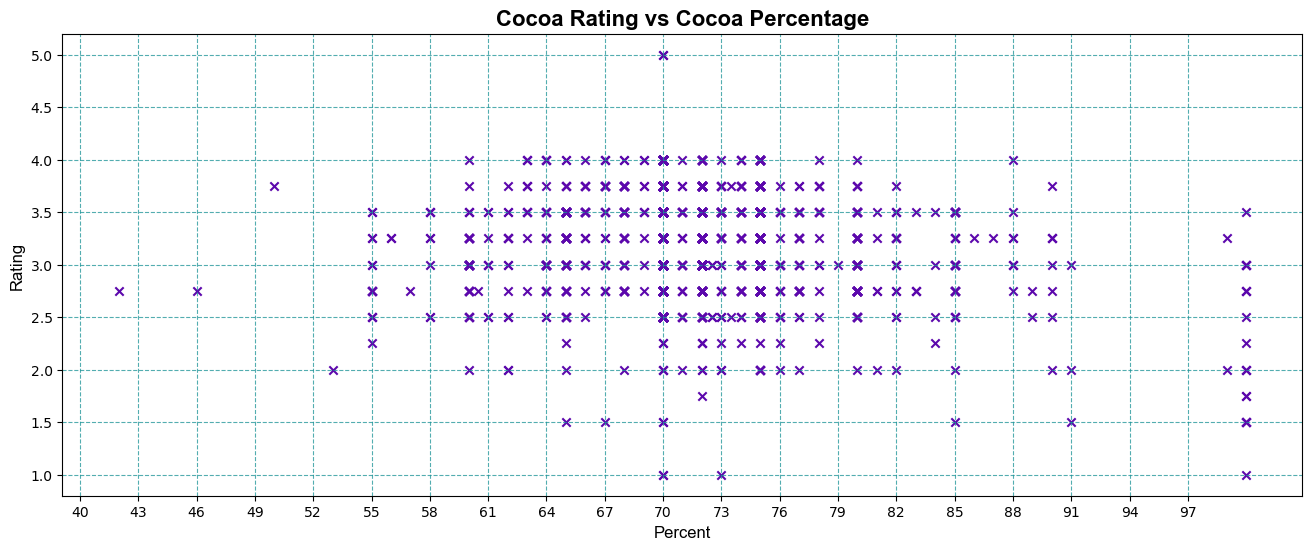

In [14]:
# Sort Cocoa Percentage
df_cleaned = df_cleaned.sort_values(by='cocoa_percent', ascending=True)

# Build scatter plot for latitude vs. temperature
# make a scatter plot

# Change Canvas Size
plt.figure(figsize=(16, 6))

# Create a basic plot
plt.scatter(df_cleaned.cocoa_percent, df_cleaned.rating, color="#5c08ac", marker="x")

# Customizations
ticks = np.arange(40, 100, 3)
plt.xticks(ticks)

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Percent", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Cocoa Rating vs Cocoa Percentage", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="#199296", alpha=0.75)

# Save chart as image
plt.savefig("cocoa_rating_vs_cocoa_percentage_scatter_plot.png")

# Show plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


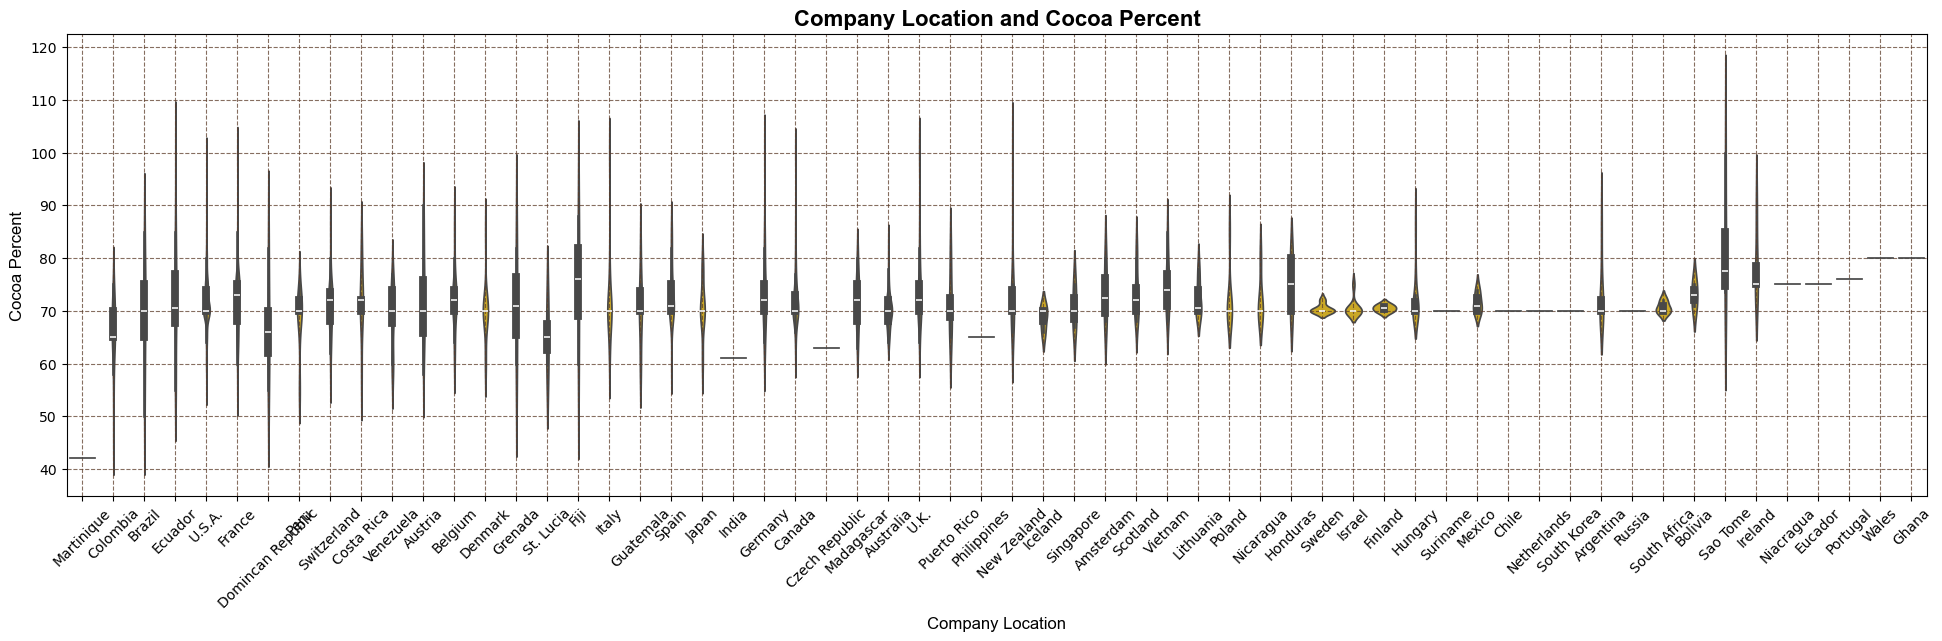

In [16]:
# Violin Plot: Comparison of company location and the cocoa solids percentage. 
# Change Canvas Size
plt.figure(figsize=(24, 6))

# Create a basic plot
sns.violinplot(data=df_cleaned, x="company_location", y="cocoa_percent", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Cocoa Percent", fontfamily="Arial", fontsize=12)
plt.title("Company Location and Cocoa Percent", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)



# Show/Save the Graph
plt.show()

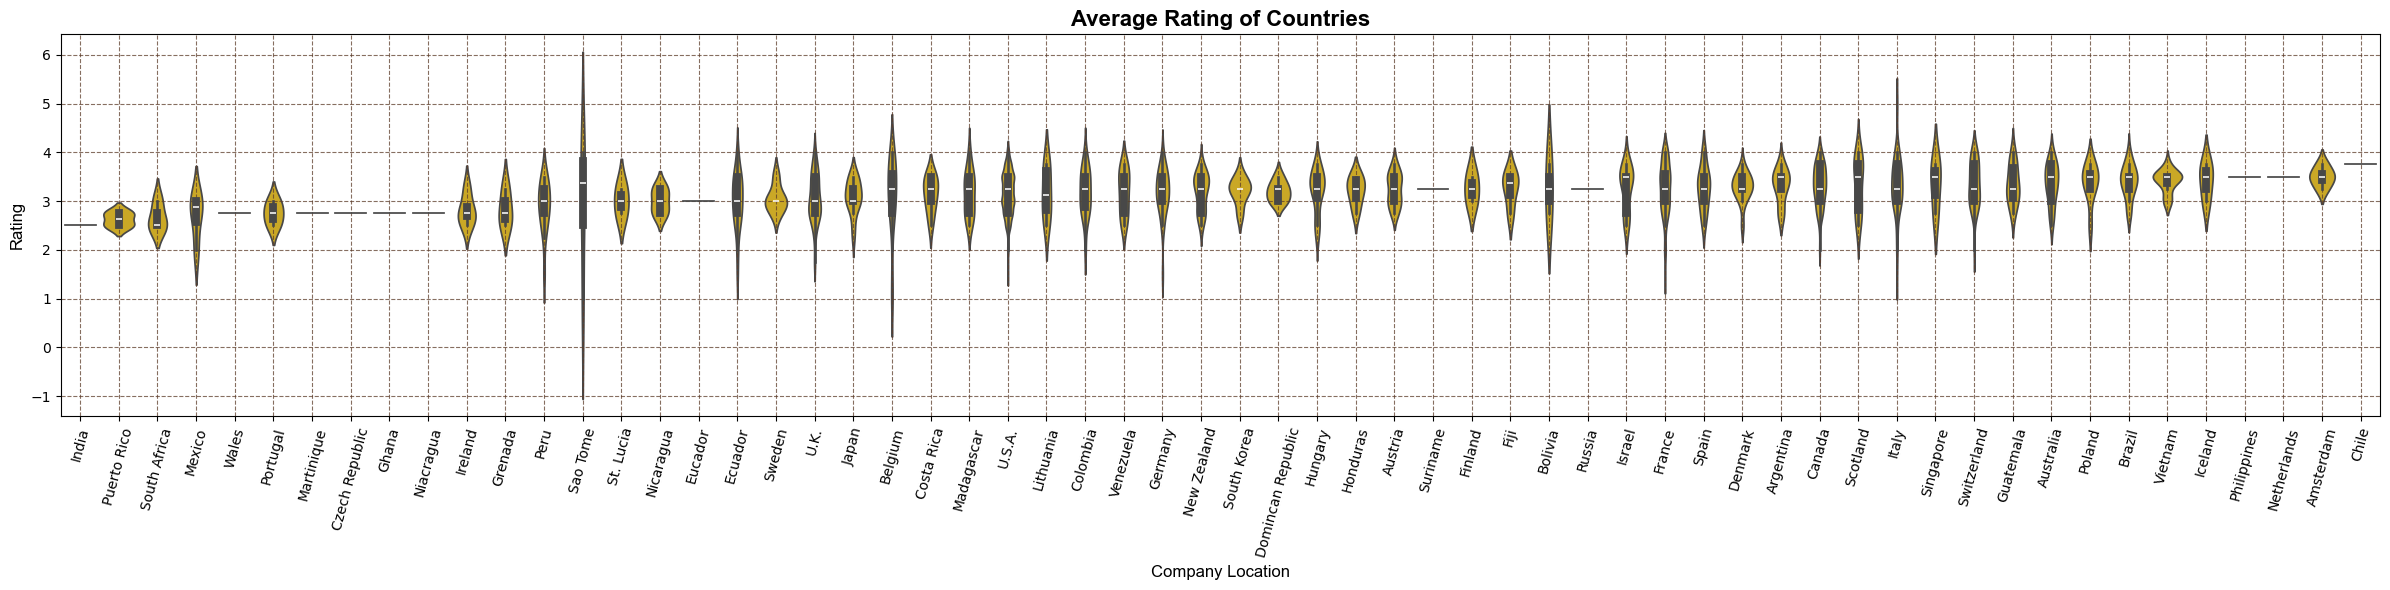

In [17]:
# Violin Plot: Comparison of company location and the cocoa solids percentage. 
sorted_avg_rating = df_cleaned.groupby("company_location")['rating'].mean().sort_values(ascending=True).index

# Change Canvas Size
plt.figure(figsize=(24, 6))

# Create a basic plot
sns.violinplot(data=df_cleaned, x="company_location", y="rating", color="#e5b80b", order=sorted_avg_rating)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Average Rating of Countries", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=75) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("avg_rating_by_countries.png")

# Show/Save the Graph
plt.tight_layout() 
plt.show()

In [36]:
top_ten_location = df_cleaned.groupby("company_location")['rating'].mean().sort_values(ascending=True).nlargest(10).index
print(top_ten_location)

Index(['Chile', 'Philippines', 'Netherlands', 'Amsterdam', 'Iceland',
       'Vietnam', 'Brazil', 'Poland', 'Australia', 'Guatemala'],
      dtype='object', name='company_location')


In [19]:
df_cleaned['company_location'].unique()

array(['Martinique', 'Colombia', 'Brazil', 'Ecuador', 'U.S.A.', 'France',
       'Domincan Republic', 'Peru', 'Switzerland', 'Costa Rica',
       'Venezuela', 'Austria', 'Belgium', 'Denmark', 'Grenada',
       'St. Lucia', 'Fiji', 'Italy', 'Guatemala', 'Spain', 'Japan',
       'India', 'Germany', 'Canada', 'Czech Republic', 'Madagascar',
       'Australia', 'U.K.', 'Puerto Rico', 'Philippines', 'New Zealand',
       'Iceland', 'Singapore', 'Amsterdam', 'Scotland', 'Vietnam',
       'Lithuania', 'Poland', 'Nicaragua', 'Honduras', 'Sweden', 'Israel',
       'Finland', 'Hungary', 'Suriname', 'Mexico', 'Chile', 'Netherlands',
       'South Korea', 'Argentina', 'Russia', 'South Africa', 'Bolivia',
       'Sao Tome', 'Ireland', 'Niacragua', 'Eucador', 'Portugal', 'Wales',
       'Ghana'], dtype=object)

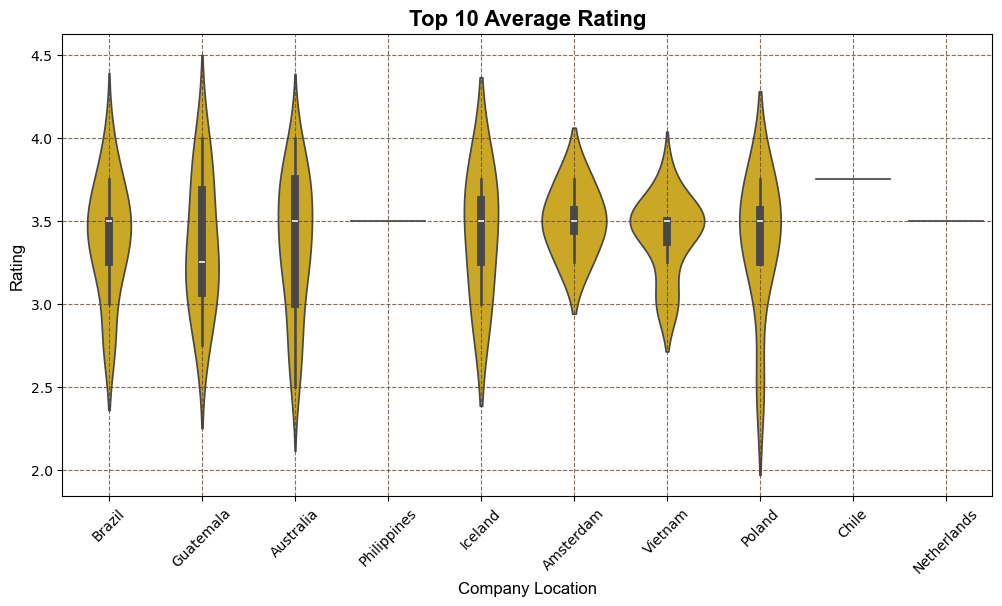

In [41]:
# Narrow down to Top 10 Company Locations
filtered_top_ten = df_cleaned[df_cleaned['company_location'].isin(top_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=filtered_top_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Top 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("top_ten_avg_cocoa_percent_by_location.png")

# Show/Save the Graph
plt.show()

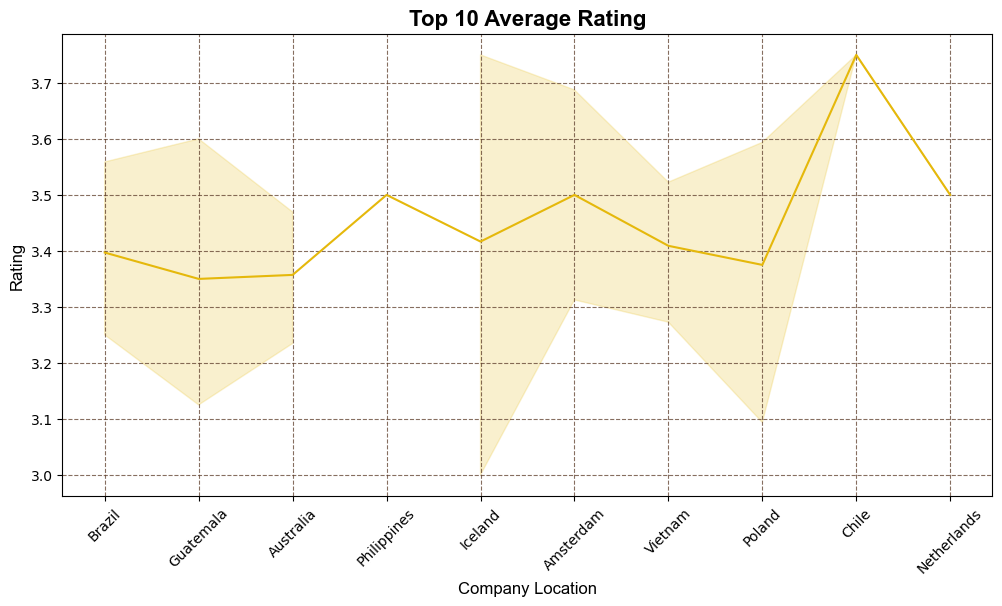

In [33]:
# Narrow down to Top 10 Company Locations
filtered_top_ten = df_cleaned[df_cleaned['company_location'].isin(top_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.lineplot(data=filtered_top_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Top 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)

# Save chart as image
plt.savefig("top_ten_avg_cocoa_percent_by_location.png")

# Show/Save the Graph
plt.show()

In [21]:
lowest_ten_location = df_cleaned.groupby("company_location")['rating'].mean().nsmallest(10).index
print(lowest_ten_location)

Index(['India', 'Puerto Rico', 'South Africa', 'Mexico', 'Czech Republic',
       'Ghana', 'Martinique', 'Niacragua', 'Portugal', 'Wales'],
      dtype='object', name='company_location')


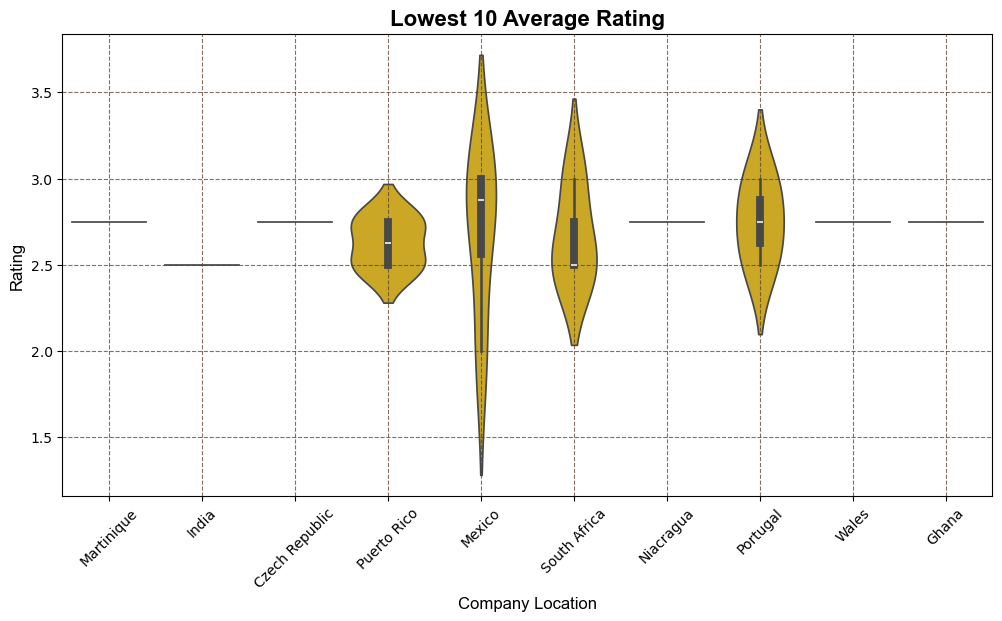

In [22]:
# Narrow down to Lowest 10 Company Locations
filtered_lowest_ten = df_cleaned[df_cleaned['company_location'].isin(lowest_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=filtered_lowest_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Lowest 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

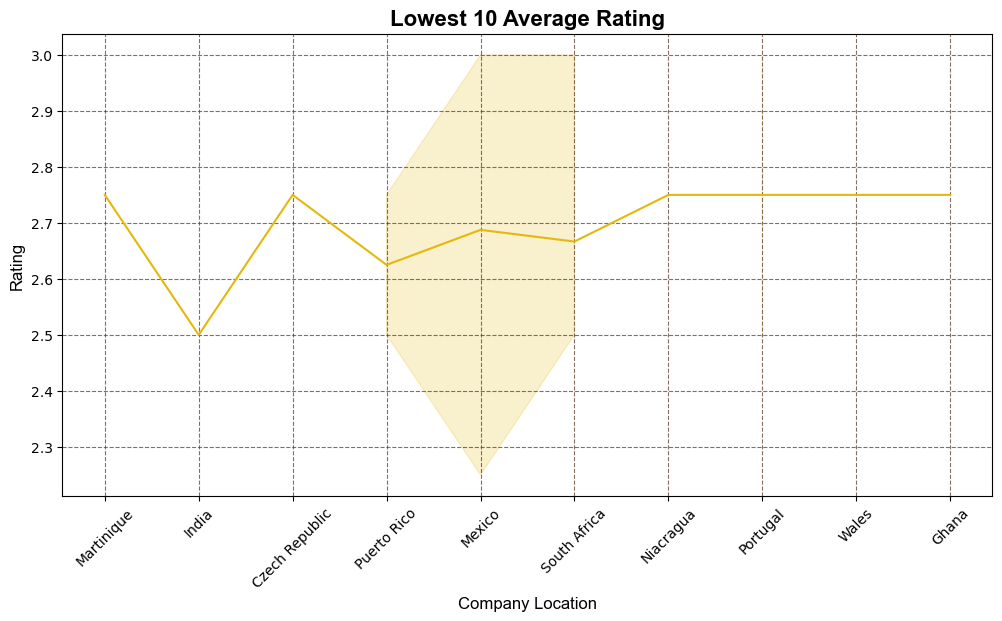

In [34]:
# Narrow down to Lowest 10 Company Locations
filtered_lowest_ten = df_cleaned[df_cleaned['company_location'].isin(lowest_ten_location)]

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.lineplot(data=filtered_lowest_ten, x="company_location", y="rating", color="#e5b80b")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Company Location", fontfamily="Arial", fontsize=12)
plt.ylabel("Rating", fontfamily="Arial", fontsize=12)
plt.title("Lowest 10 Average Rating", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=45) 

# Add in a background grid
plt.grid(linestyle="--", color="#5e3d2b", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

NameError: name 'clean_data' is not defined

In [25]:
avg_cocoa_percent = df_cleaned.groupby("company_location")['cocoa_percent'].mean()
print(avg_cocoa_percent)

company_location
Amsterdam            73.250000
Argentina            73.333333
Australia            70.224490
Austria              72.000000
Belgium              72.025000
Bolivia              73.000000
Brazil               69.823529
Canada               72.352000
Chile                70.000000
Colombia             65.739130
Costa Rica           72.000000
Czech Republic       63.000000
Denmark              69.800000
Domincan Republic    67.000000
Ecuador              72.333333
Eucador              75.000000
Fiji                 75.000000
Finland              70.500000
France               71.762821
Germany              72.942857
Ghana                80.000000
Grenada              71.000000
Guatemala            70.200000
Honduras             75.000000
Hungary              72.318182
Iceland              68.666667
India                61.000000
Ireland              78.500000
Israel               70.555556
Italy                71.190476
Japan                70.764706
Lithuania            7

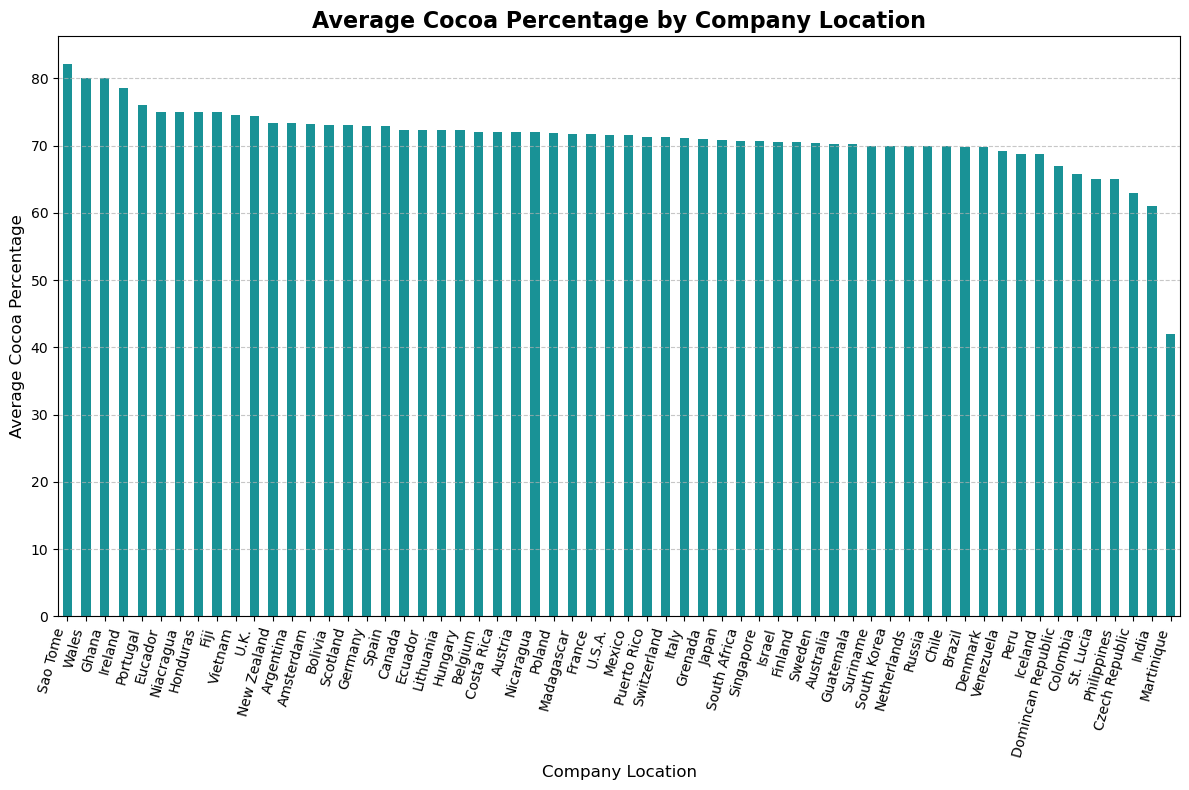

In [26]:
# Sort the data 
avg_cocoa_percent = avg_cocoa_percent.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))  
avg_cocoa_percent.plot(kind='bar', color='#199296')

# Add titles and labels
plt.title("Average Cocoa Percentage by Company Location", fontsize=16, fontweight="bold")
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Average Cocoa Percentage", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()


In [27]:
top_ten_countries = avg_cocoa_percent.nlargest(10)


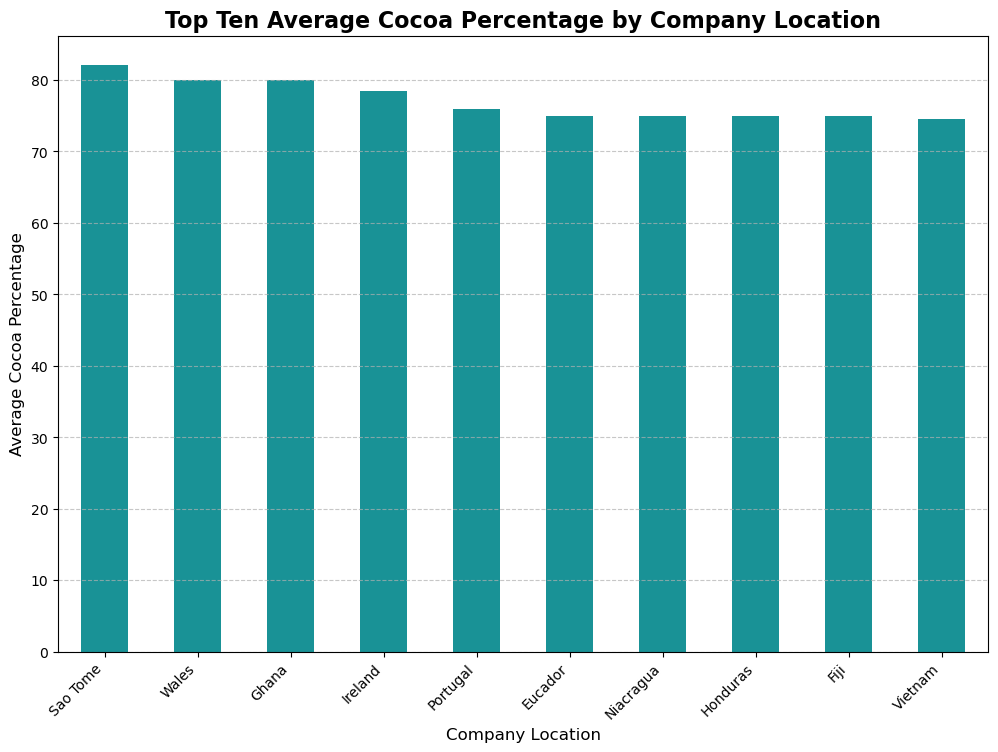

In [28]:
# Plot the data
plt.figure(figsize=(12, 8))  
top_ten_countries.plot(kind='bar', color='#199296')

# Add titles and labels
plt.title("Top Ten Average Cocoa Percentage by Company Location", fontsize=16, fontweight="bold")
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Average Cocoa Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

In [29]:
avg_ratings = df_cleaned.groupby('company_location')['rating'].mean()
avg_ratings_sorted = avg_ratings.sort_values(ascending=False)
print(avg_ratings_sorted)

company_location
Chile                3.750000
Amsterdam            3.500000
Netherlands          3.500000
Philippines          3.500000
Iceland              3.416667
Vietnam              3.409091
Brazil               3.397059
Poland               3.375000
Australia            3.357143
Guatemala            3.350000
Switzerland          3.342105
Singapore            3.333333
Italy                3.325397
Scotland             3.325000
Canada               3.324000
Argentina            3.305556
Denmark              3.283333
Spain                3.270000
France               3.251603
Suriname             3.250000
Israel               3.250000
Finland              3.250000
Fiji                 3.250000
Bolivia              3.250000
Russia               3.250000
Austria              3.240385
Honduras             3.208333
Hungary              3.204545
South Korea          3.200000
Domincan Republic    3.200000
New Zealand          3.191176
Germany              3.178571
Venezuela            3.